# Tarea 4 - Ejercicio 1

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt 
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import os
from math import sqrt
%matplotlib inline

In [2]:
data_mundo = pd.read_csv("data_world.csv")
data_mundo

,x1,x2,color
0,0.293714,0.630976,brown
1,0.321981,0.661564,brown
2,0.338671,0.552370,brown
3,0.300610,0.634442,brown
4,0.348797,0.634638,brown
...,...,...,...
2901,0.534710,0.552632,darkgreen
2902,0.566506,0.532039,darkgreen
2903,0.596373,0.489698,darkgreen
2904,0.512080,0.539454,darkgreen


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Visualización de los datos en 2 dimensiones')

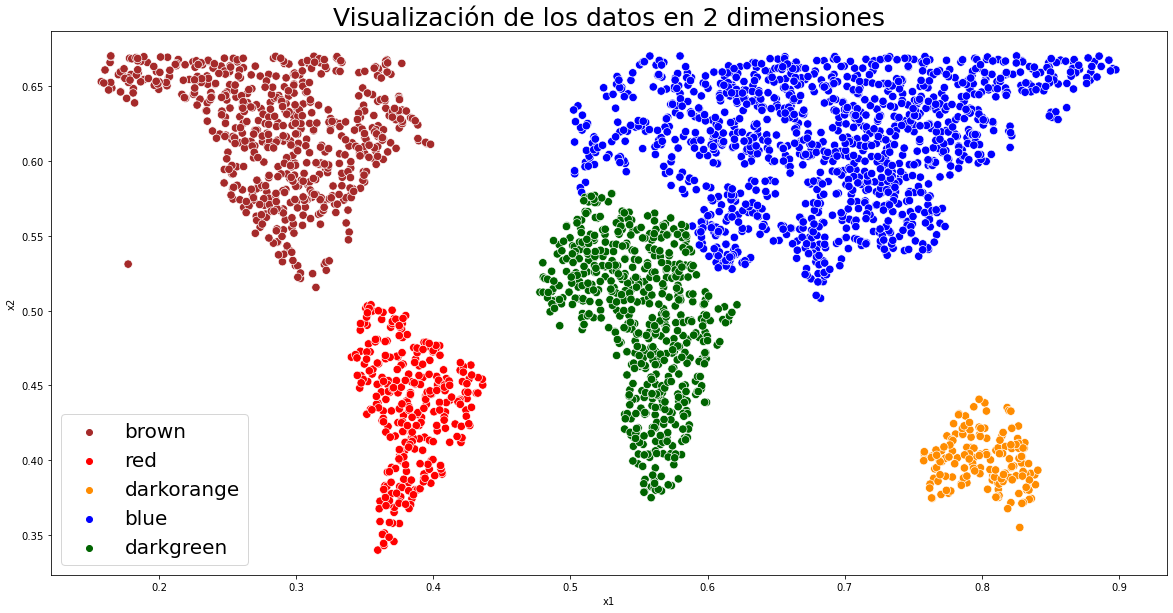

In [3]:
custom_palette=['brown','red','darkorange','blue','darkgreen']
sns.set_palette(sns.color_palette(custom_palette))
fig, ax = plt.subplots(figsize = (20,10))
sns.scatterplot(data_mundo['x1'],data_mundo['x2'], hue =data_mundo['color'],s=70)
plt.legend(fontsize=20)
plt.title('Visualización de los datos en 2 dimensiones',fontsize=25)

Una vez que ya tenemos los datos y realizamos la gráfica correspondiente vamos a trabajar con ellos pero en un espacio de tres dimensiones, de la siguiente forma:

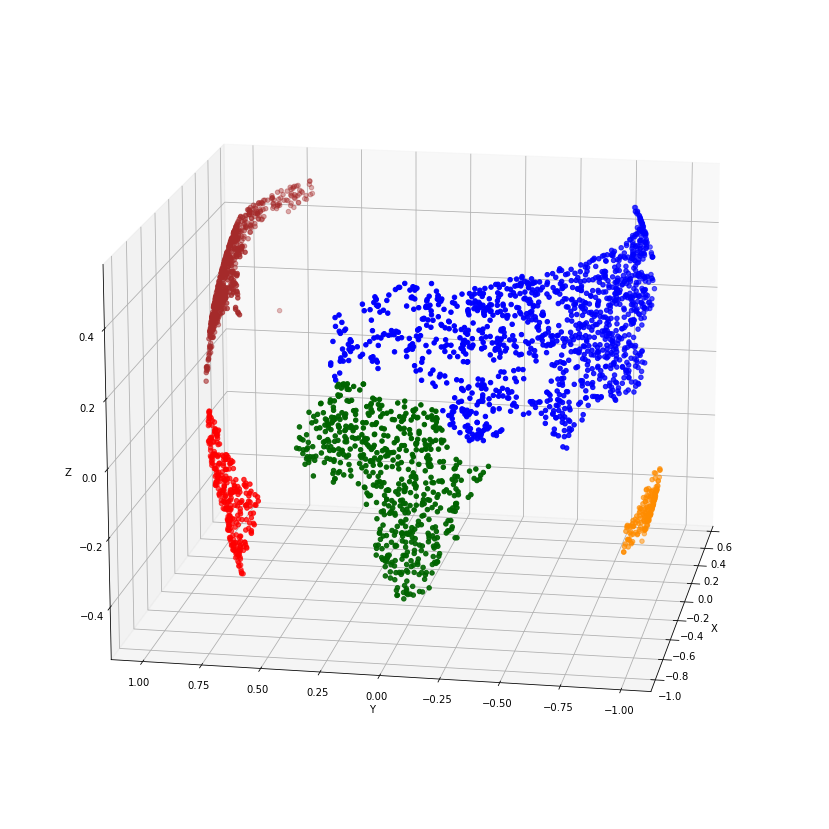

In [4]:
X = data_mundo
y = X.iloc[:, 2]
p = X.iloc[:, 0]*(2*3.1416 - 0.55)#np.pi
t = X.iloc[:, 1]*np.pi
x_sphere = np.sin(t)*np.cos(p)
y_sphere = np.sin(t)*np.sin(p)
z_sphere = np.cos(t)

X_sphere = np.array([x_sphere , y_sphere , z_sphere]).T
X_sphere.shape

from mpl_toolkits import mplot3d
plt.figure(figsize=(20,15))
ax = plt.axes(projection = '3d')
ax.view_init(16, -170)
ax.scatter3D(X_sphere[:, 0],X_sphere[:, 1], -X_sphere[:, 2], c = y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [5]:
m_1 = pd.DataFrame(X_sphere)
m_1

,0,1,2
0,-0.103462,0.910674,-0.399960
1,-0.237466,0.841047,-0.486054
2,-0.357534,0.919426,-0.163784
3,-0.138706,0.901515,-0.409917
4,-0.379244,0.829266,-0.410478
...,...,...,...
2901,-0.983514,0.074882,-0.164597
2902,-0.989323,-0.105562,-0.100484
2903,-0.961230,-0.273843,0.032361
2904,-0.971401,0.202720,-0.123630


Ya que tenemos nuestros datos en una dimensión de tres variables vamos a realizar PCA, Kernel PCA, Spectral Embeddings y t-SNE. Donde intentareamos encontrar los patrones que tenemos en dos dimensiones.

### Realizamos PCA

In [6]:
scaler = StandardScaler(with_mean=True,with_std=True)
estandar = scaler.fit_transform(X_sphere)
pca_f=PCA(3)
data_proj = pca_f.fit_transform(estandar)
#volvemos nuestros datos en un dataframe
tabla_1 = pd.DataFrame(data_proj)

In [7]:
proy_1 = tabla_1
proy_1['Nombre'] = X.iloc[:,2]
proy_1.columns = ['pc1','pc2','pc3','Continente']
proy_1

,pc1,pc2,pc3,Continente
0,1.686046,0.920434,-0.366435,brown
1,1.612019,0.635411,-0.755180,brown
2,0.639763,1.285517,-0.268014,brown
3,1.639512,0.880158,-0.445034,brown
4,1.156826,0.715675,-0.819794,brown
...,...,...,...,...
2901,-0.858044,0.027790,-0.835911,darkgreen
2902,-1.088767,-0.085555,-0.586370,darkgreen
2903,-1.415303,-0.048191,-0.126667,darkgreen
2904,-0.886446,0.267804,-0.799270,darkgreen


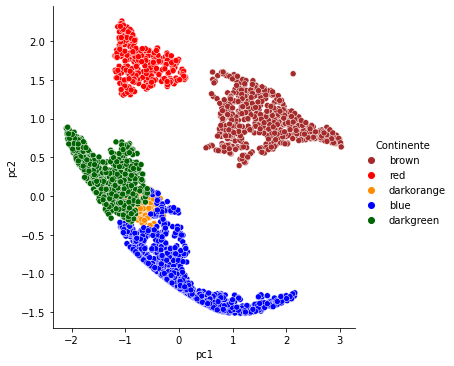

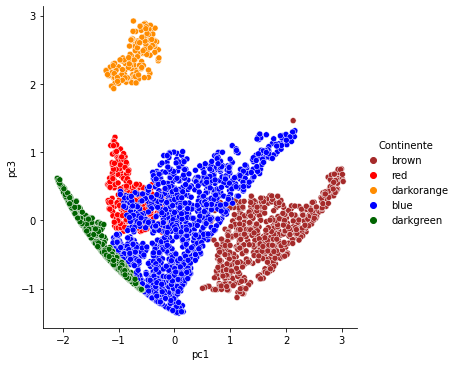

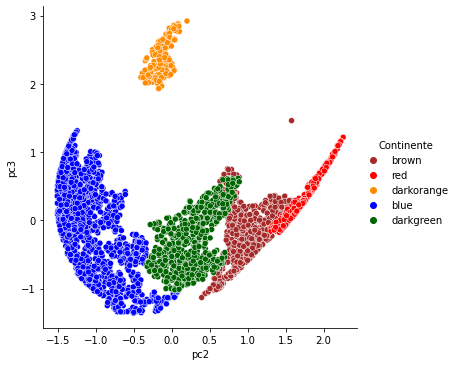

In [8]:
import seaborn as sns
#fig.add_subplot(321)
sns.relplot(x='pc1', y='pc2', hue='Continente',data=proy_1)
#fig.add_subplot(322)
sns.relplot(x='pc1', y='pc3', hue='Continente',data=proy_1)
#fig.add_subplot(323)
sns.relplot(x='pc2', y='pc3', hue='Continente',data=proy_1)

Se intento encontrar una buena representación de los datos y el más interesante es fue con los primeros dos primeros componentes principales.

### Realizamos Kernel PCA

In [15]:
from sklearn.decomposition import KernelPCA # estandarizar y justificar
sigma = 5.5 #0.8
ncomp = 3
kpca = KernelPCA(n_components=3, kernel='poly', gamma=1/sigma) ##linear,poly,rbf,sigmoid-b,cosine,precomputed
# rbf - 0.1, 1ya
# sigmoid - 2.5, 1ya
# cosine - 1, 0.5, 2.5
# linear 1.5
# poly 5.5
mesh_kpca = kpca.fit_transform(X_sphere) #X_sphere-estandar

In [16]:
tabla_2 = pd.DataFrame(mesh_kpca)
tabla_2['Nombre'] = X.iloc[:,2]
tabla_2.columns = ['kpc1','kpc2','kpc3','Nombre']

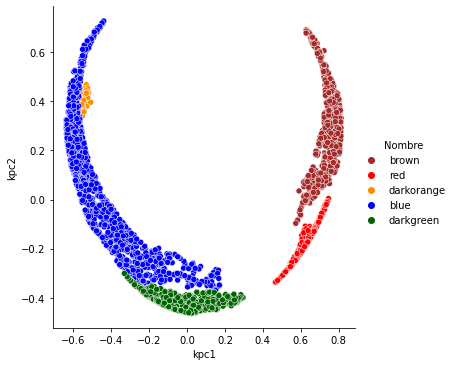

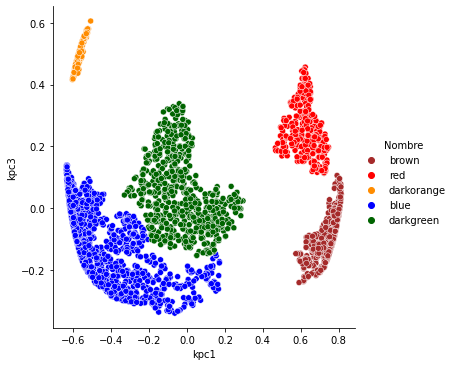

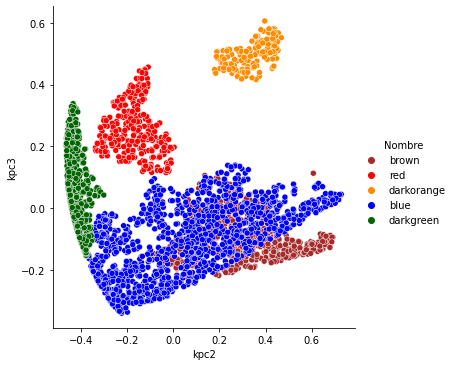

In [17]:
sns.relplot(x='kpc1', y='kpc2', hue='Nombre',data=tabla_2)
sns.relplot(x='kpc1', y='kpc3', hue='Nombre',data=tabla_2)
sns.relplot(x='kpc2', y='kpc3', hue='Nombre',data=tabla_2)

Ya hemos analizado con distintos kernel para obtener una buena representación de los datos, en repetidas ocasiones vemos que los datos se representan mejor en el primer y tercer componente.

### Ahora realizamos Spectral Embeddings

Con este método pretendemos encontrar una buena representación de los datos o lo más cercano a la primer gráfica que nos proporcionan.

In [18]:
from sklearn.cluster import KMeans
import os
os.chdir('C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_4')
from spectral_clustering import *

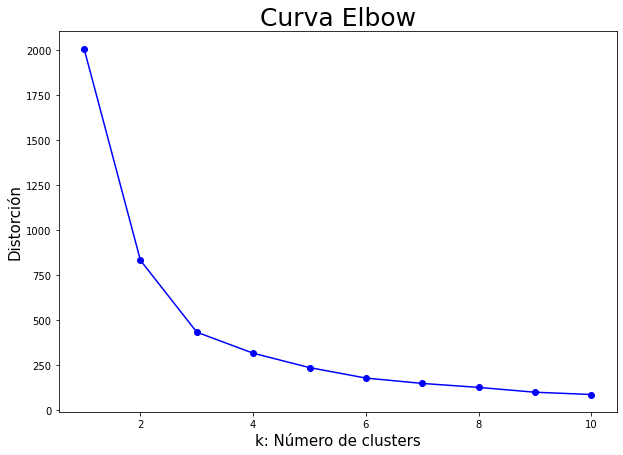

In [19]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_sphere)
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), distortions, marker='o',color='blue')
plt.xlabel('k: Número de clusters',fontsize=15)
plt.ylabel('Distorción',fontsize=15)
plt.title('Curva Elbow',fontsize=25)
plt.show()

En esta sección debemos empezar a variar nuestros parametros ya que buscamos encontrar una buena representación de los datos y no solo eso sino que se busca que los datos nos den una representación como en la figura que se presento al principio.

In [20]:
X_sphere.shape

(2906, 3)

In [37]:
knn = 5 # k-vecinos cercanos para la construcción del grafo
sigma = 2.5 # sigma del Kernel Gaussiano
lflag = 'sym' # Tipo de Laplaciano
"""
En esta parte vamos a revisar el kernel e ir variando los parametros
rw - 0.8,10: presenta una separación algo rara de los datos 
rw - 2.5,10: los valores propios que tienen buena representacion se presentan despues del quinto
rw - 0.8,5: me logra dar una buena separación de por lo menos 4 de los 5 continentes, con 2 y 3
rw - 0.9,8,F: 


sym - 0.8,5: no tenemos muy buenos resultados 
sym - 2.5,5,T: Al realizar el cambio de mutual vemos que logra separar nuestros datos de buena forma despues del punto
3 en adelante, 
sym - 1.5,8,T: No tiene buenos resultados
sym - 1.5,8,F: Con estos parametros logramos encontrar un buen cluster pero 
"""

kclust=5
indices, knn_graph = graph(X_sphere,knn,mutual=True)# modificamos el mutual OJO PRRO
W = adjacency_matrix(X_sphere, knn_graph, sigma, True)
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

<AxesSubplot:title={'center':'eigenvector 8'}, xlabel='x1', ylabel='x2'>

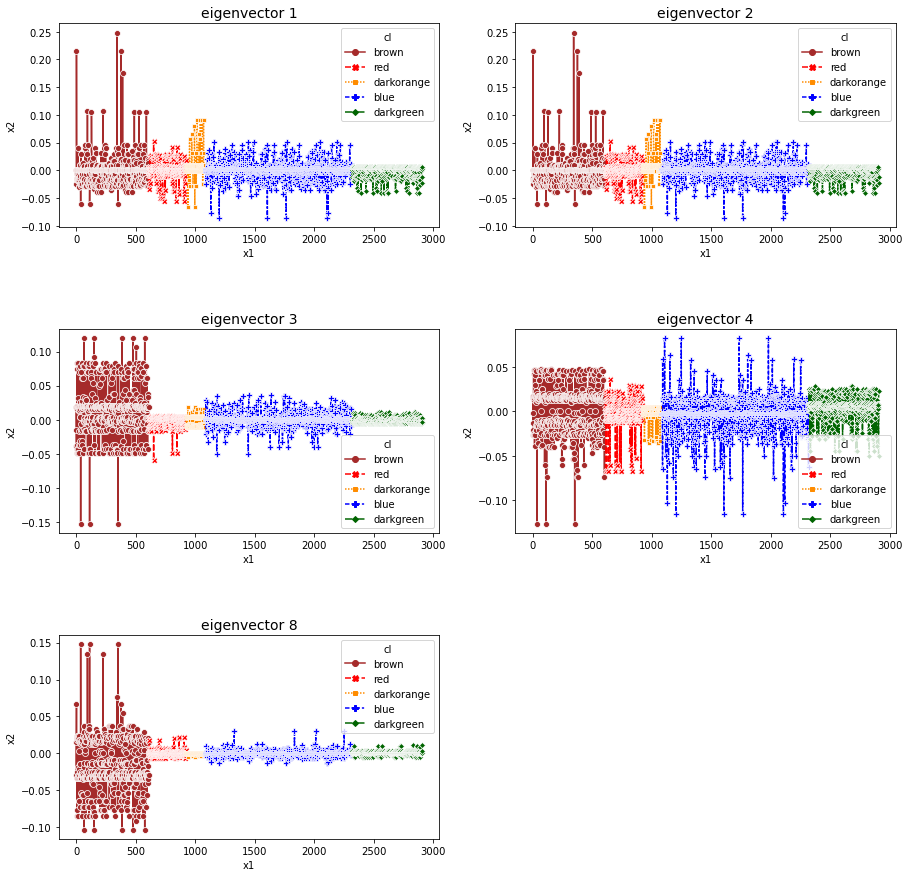

In [38]:
nv = 100
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

#fig.add_subplot(321)
#plt.title('valores propios', fontsize=14)
#plt.scatter(range(nv),np.round(vals[:nv]))
fig.add_subplot(321)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=X.iloc[:,2]))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(322)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,3],cl=X.iloc[:,2]))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,4],cl=X.iloc[:,2]))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,5],cl=X.iloc[:,2]))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl',legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,8],cl=X.iloc[:,2]))
plt.title('eigenvector 8', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)

<AxesSubplot:title={'center':'eigenvector 1'}, xlabel='x1', ylabel='x2'>

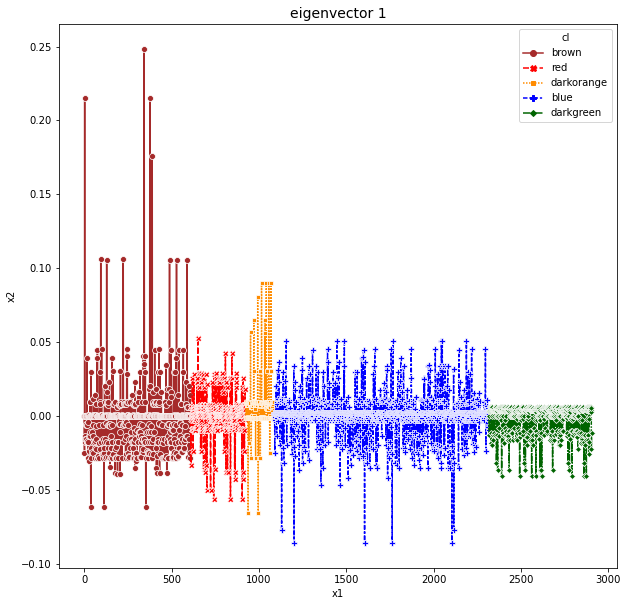

In [83]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=X.iloc[:,2]))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', legend = 'brief',
               style = 'cl', markers = True)

<AxesSubplot:xlabel='proyeccion5', ylabel='proyeccion6'>

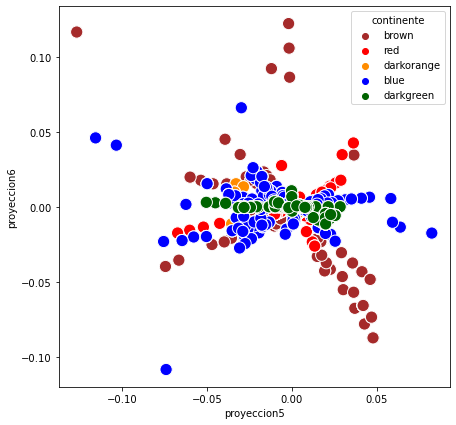

In [46]:
# Representamos en dos dimensiones los datos 
repre_2d = pd.DataFrame({'proyeccion6':vecs[:,6], 'proyeccion5':vecs[:,5], 'continente':X.iloc[:,2]})
fig = plt.figure(figsize=(7,7))
plt.subplots_adjust(hspace = 0.5)
sns.scatterplot(x='proyeccion5', y='proyeccion6', data = repre_2d, hue='continente', s=150, legend = 'brief')

In [92]:
repre_2d

,pc1,pc2,continente
0,0.015140,-0.020823,brown
1,-0.013671,0.011609,brown
2,-0.001752,0.105722,brown
3,0.016927,-0.023281,brown
4,-0.026971,0.019977,brown
...,...,...,...
2901,0.004373,0.000952,darkgreen
2902,0.002766,0.000602,darkgreen
2903,0.007599,-0.000391,darkgreen
2904,-0.050459,0.002943,darkgreen


Finalmente realizamos un grafico para observar si se realiza muy bien los clusters 

In [131]:
kclust = 5
kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)

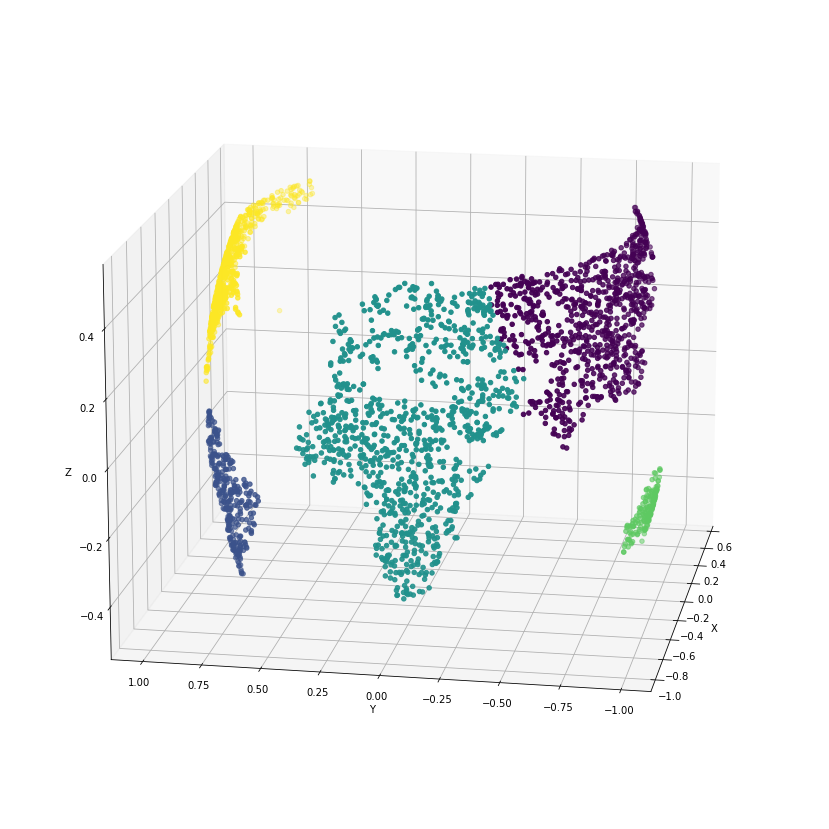

In [132]:
X = data_mundo
y2 = y_km
p = X.iloc[:, 0]*(2*3.1416 - 0.55)#np.pi
t = X.iloc[:, 1]*np.pi
x_sphere = np.sin(t)*np.cos(p)
y_sphere = np.sin(t)*np.sin(p)
z_sphere = np.cos(t)

X_sphere = np.array([x_sphere , y_sphere , z_sphere]).T
X_sphere.shape

from mpl_toolkits import mplot3d
plt.figure(figsize=(20,15))
ax = plt.axes(projection = '3d')
ax.view_init(16, -170)
ax.scatter3D(X_sphere[:, 0],X_sphere[:, 1], -X_sphere[:, 2], c = y2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#### Usando comando y más directos 

In [9]:
from sklearn.manifold import SpectralEmbedding
scaler = StandardScaler(with_mean=True,with_std=True)
p = scaler.fit_transform(X_sphere)

knn = 4 # k-vecinos cercanos para la construcción del grafo
sigma = 0.3 # sigma del Kernel Gaussiano
lflag = 'rw' # Tipo de Laplaciano

#model2 = SpectralEmbedding(n_components=4,affinity='nearest_neighbors',gamma=sigma,eigen_solver='arpack',
#                           n_neighbors=knn).fit(X_sphere)

In [22]:
#spemd = SpectralEmbedding(n_components=3, affinity='rbf', n_neighbors=knn)
#faces = spemd.fit_transform(X_sphere)

model2 = SpectralEmbedding(n_components = 5, affinity ='rbf', gamma = 2.5, eigen_solver = 'arpack', n_neighbors = 3).fit(X_sphere)
data_vecs_se = pd.DataFrame(dict(x1=model2.embedding_[:,0], x2 = model2.embedding_[:,1], x3 = model2.embedding_[:,2], x4 = model2.embedding_[:,3], x5 = model2.embedding_[:,4], cl = X.iloc[:,2]))

<AxesSubplot:xlabel='x1', ylabel='x3'>

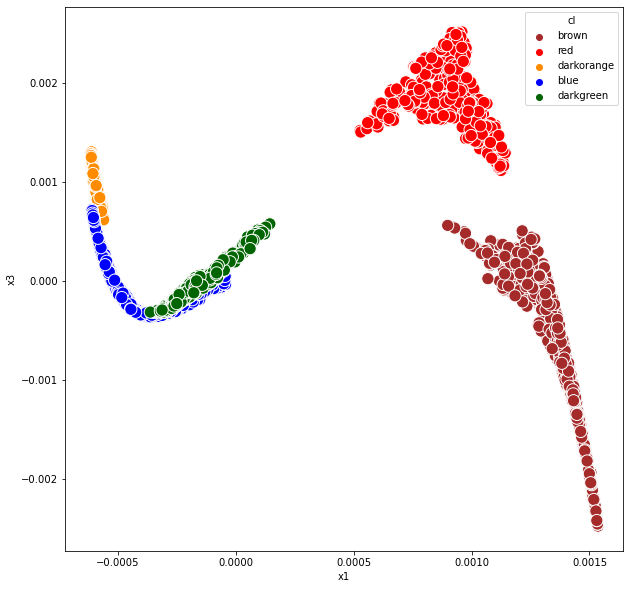

In [24]:
#repre_2d = pd.DataFrame({'componente1':faces[:,0], 'componente2':faces[:,1],'componente3':faces[:,2], 'continente':X.iloc[:,2]})
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
sns.scatterplot(x='x1', y='x3', data = data_vecs_se, hue='cl', s=150, legend = 'brief')


In [182]:
v = pd.DataFrame(faces)
v

,0,1,2
0,0.004979,0.004505,1.018443e-13
1,0.004979,0.004505,8.885193e-14
2,0.007727,0.000351,1.593527e-13
3,0.004979,0.004505,1.076181e-13
4,0.007727,0.000351,1.602169e-13
...,...,...,...
2901,-0.005011,-0.002057,1.682707e-02
2902,-0.005011,-0.002057,1.555734e-02
2903,-0.005011,-0.002057,1.686816e-02
2904,-0.005011,-0.002057,1.780990e-02


### Realizamos t-SNE

In [31]:
from sklearn.manifold import TSNE
### estandarizamos los datos
scaler = StandardScaler(with_mean=True,with_std=True)
p = scaler.fit_transform(X_sphere)

#np.random.seed(0)
tsne = TSNE(perplexity=2400, verbose = 1)
X_tsne = tsne.fit_transform(p)#

[t-SNE] Computing 2905 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.000s...
[t-SNE] Computed neighbors for 2906 samples in 0.819s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 2.326925
[t-SNE] KL divergence after 50 iterations with early exaggeration: 31.895205
[t-SNE] KL divergence after 600 iterations: 0.019463


In [32]:
tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'nombre':X.iloc[:,2]})

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

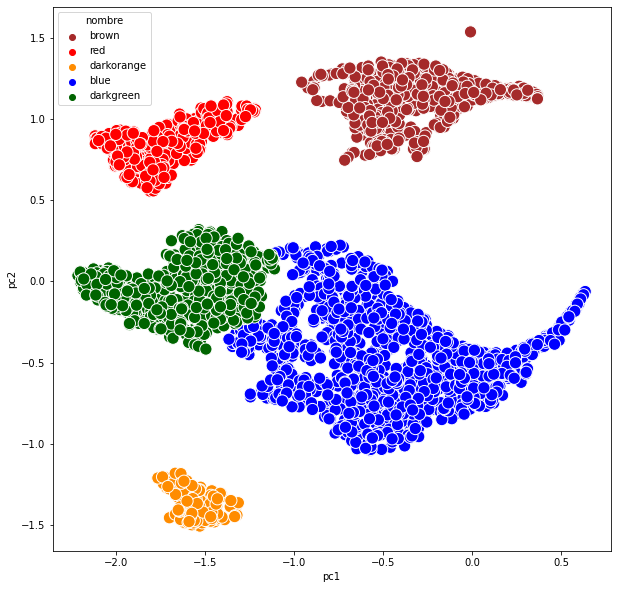

In [33]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
#sns.lineplot(x='pc1', y='pc2', data = tsne_dataset, hue='nombre', legend = 'brief',
#               style = 'nombre', markers = True)

sns.scatterplot(x='pc1', y='pc2', data = tsne_dataset, hue='nombre', s=150, legend = 'brief')